In [1]:
from dataset import ImageDataset, load_dataset, train_val_split, data_augmentation
from model import CNN, CNNWithNAL
import torch
from sklearn.metrics import accuracy_score
import pickle

torch.cuda.empty_cache()

# FashionMNIST0.6
## Load dataset

In [2]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.6.npz')

## Preprocessing

In [3]:
T = torch.tensor([[0.4, 0.3, 0.3],
                  [0.3, 0.4, 0.3],
                  [0.3, 0.3, 0.4]], dtype=torch.float32)
training_subset, training_sub_labels, validation_subset, validation_sub_labels = train_val_split(training_data, training_labels)
aug_training, aug_labels = data_augmentation(training_subset, training_sub_labels)

# train_dataset = ImageDataset(aug_training, aug_labels, transition_matrix=T)
# val_dataset = ImageDataset(validation_subset, validation_sub_labels, transition_matrix=T)
# test_dataset = ImageDataset(testing_data, testing_labels)
train_dataset = ImageDataset(training_subset, training_sub_labels, transition_matrix=T)
val_dataset = ImageDataset(validation_subset, validation_sub_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [8]:
import os
if not os.path.exists('results/cnn_fashionmnist0.6_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.6")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnn_fashionmnist0.6_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 1.0981, Validation Loss: 1.0960, Validation Accuracy: 36.83%
Epoch [2/100], Training Loss: 1.0930, Validation Loss: 1.0936, Validation Accuracy: 37.97%
Epoch [3/100], Training Loss: 1.0923, Validation Loss: 1.0923, Validation Accuracy: 38.25%
Epoch [4/100], Training Loss: 1.0918, Validation Loss: 1.1058, Validation Accuracy: 34.14%
Epoch [5/100], Training Loss: 1.0916, Validation Loss: 1.0919, Validation Accuracy: 38.44%
Epoch [6/100], Training Loss: 1.0917, Validation Loss: 1.0932, Validation Accuracy: 38.08%
Epoch [7/100], Training Loss: 1.0917, Validation Loss: 1.0927, Validation Accuracy: 38.47%
Epoch [8/100], Training Loss: 1.0914, Validation Loss: 1.0926, Validation Accuracy: 38.33%
Epoch [9/100], Training Loss: 1.0943, Validation Loss: 1.1021, Validation Accuracy: 34.58%
Epoch [10/100], Training Loss: 1.0924, Validation Loss: 1.0932, Validation Accuracy: 38.42%
Epoch [11/100], Training Loss: 1.0914, Valida

## CNN with Noise Adaption Layer Training

In [4]:
import os
if not os.path.exists('results/cnnwithnal_fashionmnist0.6_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNNWithNAL(num_classes=3, dataset_name="FashionMNIST0.6")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnnwithnal_fashionmnist0.6_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnnwithnal_fashionmnist0.6_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch: 0/100


c:\Users\Ronald\Desktop\COMP5328_A2\utils.py:30: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  print('# Train || Loss : %.4f , Acc : %.4f%%' % (train_loss_meter.val, train_acc_meter.val * 100.0))


# Train || Loss : 1.1074 , Acc : 31.2500%
# Evaluation || Loss : 1.1153, Acc : 25.0000%
Epoch: 1/100
# Train || Loss : 1.0660 , Acc : 43.7500%
# Evaluation || Loss : 1.0815, Acc : 50.0000%
Epoch: 2/100
# Train || Loss : 1.0954 , Acc : 37.5000%
# Evaluation || Loss : 1.0888, Acc : 37.5000%
Epoch: 3/100
# Train || Loss : 1.0933 , Acc : 40.6250%
# Evaluation || Loss : 1.0978, Acc : 50.0000%
Epoch: 4/100
# Train || Loss : 1.0936 , Acc : 35.9375%
# Evaluation || Loss : 1.0980, Acc : 31.2500%
Epoch: 5/100
# Train || Loss : 1.1132 , Acc : 39.0625%
# Evaluation || Loss : 1.0897, Acc : 37.5000%
Epoch: 6/100
# Train || Loss : 1.1303 , Acc : 28.1250%
# Evaluation || Loss : 1.0816, Acc : 37.5000%
Epoch: 7/100
# Train || Loss : 1.1144 , Acc : 32.8125%
# Evaluation || Loss : 1.1104, Acc : 25.0000%
Epoch: 8/100
# Train || Loss : 1.0715 , Acc : 40.6250%
# Evaluation || Loss : 1.1111, Acc : 43.7500%
Epoch: 9/100
# Train || Loss : 1.0981 , Acc : 31.2500%
# Evaluation || Loss : 1.0911, Acc : 50.0000%
Epo

# Visualisation

C:\Users\brian\AppData\Local\Temp\ipykernel_71616\3385163693.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)


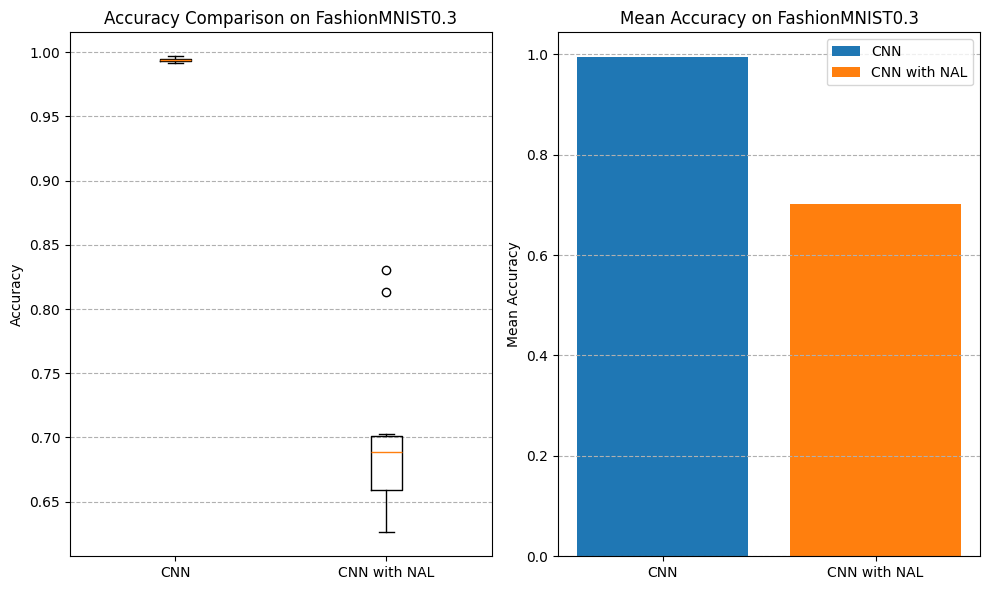

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnn_acc_06 = pickle.load(f)

with open('results/cnnwithnal_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_06 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.3')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_06), np.mean(cnnwithnal_acc_06)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.3')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.savefig("figures/mnist0.3_result.png", dpi=300)
plt.show()


C:\Users\brian\AppData\Local\Temp\ipykernel_71616\1686148792.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)


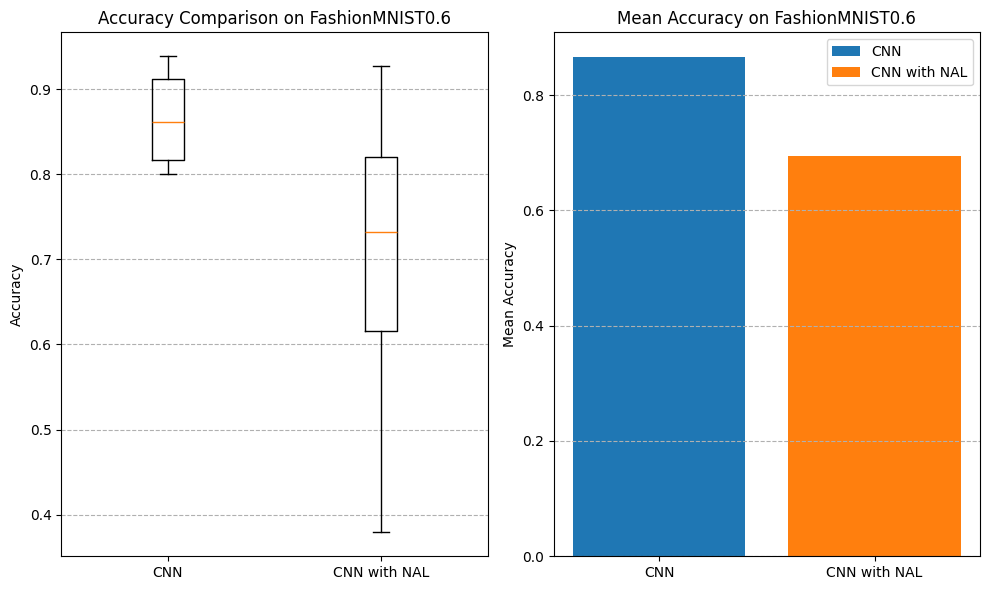

In [8]:
with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'rb') as f:
    cnn_acc_06 = pickle.load(f)

with open('results/cnnwithnal_fashionmnist0.6_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_06 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.6')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_06), np.mean(cnnwithnal_acc_06)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.6')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.savefig("figures/mnist0.6_result.png", dpi=300)
plt.show()


C:\Users\brian\AppData\Local\Temp\ipykernel_71616\3388027657.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)


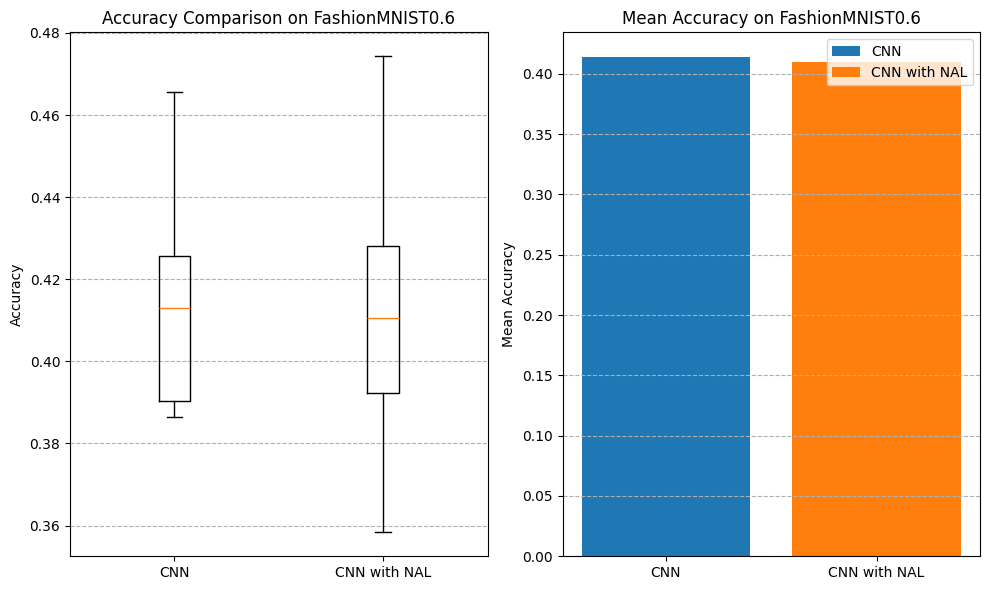

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_CIFAR_acc_results.pkl', 'rb') as f:
    cnn_acc_06 = pickle.load(f)

with open('results/cnnwithnal_CIFAR_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_06 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.6')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_06), np.mean(cnnwithnal_acc_06)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.6')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.savefig("figures/CIFAR_result.png", dpi=300)
plt.show()


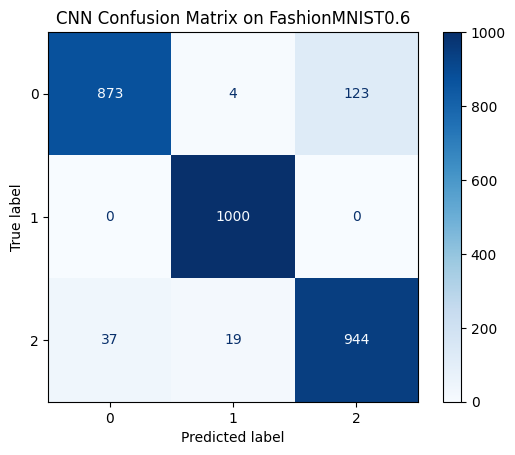

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
with open('results/cnn_fashionmnist0.6_pred_results.pkl', 'rb') as f:
    cnn_pred_results_06 = pickle.load(f)
y_true = cnn_pred_results_06[0][0]
y_pred = cnn_pred_results_06[0][1]
cm = confusion_matrix(y_true, y_pred)
confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
confusion_disp.plot(cmap=plt.cm.Blues)
plt.title('CNN Confusion Matrix on FashionMNIST0.6')
plt.show()